WE will do the following:
1. Load an image
2. With PCA, we will reduce the dimensionality of the image
3. see the effect of the reduction of dimensionality in the image
4. use fourier transform to see the frequency components of the image
5. use wavelet transform to see the wavelet components of the image
6. use fast fourier transform to see the frequency components of the image
7. use fast wavelet transform to see the wavelet components of the image
8. Comparar los resultados de las diferentes transformadas\n",
9. Visualizar la reconstrucción de la imagen usando diferentes números de componentes\n",
10. Analizar el error de reconstrucción vs número de componentes\n",
11. Comparar el tiempo de procesamiento entre los diferentes métodos\n",
12. Visualizar los coeficientes wavelet en diferentes escalas\n",
13. Analizar el espectro de frecuencias usando FFT\n",
14. Reconstruir la imagen usando diferentes bandas de frecuencia"


In [4]:
# code implementation
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.fftpack import fft2, ifft2, fftshift
import pywt
from skimage import io
import time

In [5]:

# 1. Cargar una imagen
imagen = io.imread('imagen_ejemplo.jpg', as_gray=True)

# 2. Reducción de dimensionalidad con PCA
def aplicar_pca(imagen, n_componentes):
    pca = PCA(n_components=n_componentes)
    imagen_reshape = imagen.reshape(-1, imagen.shape[1])
    imagen_pca = pca.fit_transform(imagen_reshape)
    imagen_reconstruida = pca.inverse_transform(imagen_pca)
    return imagen_reconstruida.reshape(imagen.shape)



In [6]:
# 3. Efecto de la reducción de dimensionalidad
n_componentes = [5, 10, 20, 50]
imagenes_pca = []
for n in n_componentes:
    img_pca = aplicar_pca(imagen, n)
    imagenes_pca.append(img_pca)

In [7]:
# 4. Transformada de Fourier
fourier = fft2(imagen)
fourier_shift = fftshift(fourier)
espectro_fourier = np.log(np.abs(fourier_shift) + 1)

In [8]:
# 5. Transformada Wavelet
coefs = pywt.wavedec2(imagen, 'db1', level=3)
imagen_wavelet = pywt.waverec2(coefs, 'db1')

# 6. FFT
tiempo_inicio = time.time()
fft_resultado = fft2(imagen)
tiempo_fft = time.time() - tiempo_inicio

# 7. Fast Wavelet Transform
tiempo_inicio = time.time()
fwt_resultado = pywt.wavedec2(imagen, 'db1', level=3)
tiempo_fwt = time.time() - tiempo_inicio


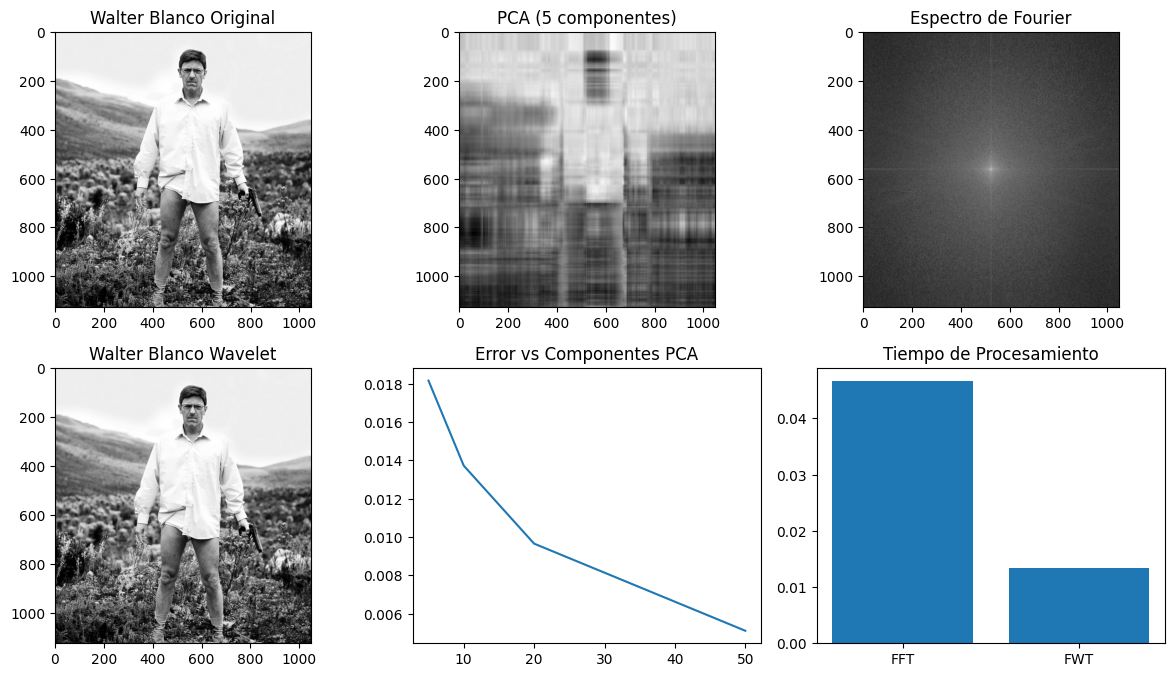

In [11]:

# 8-14. Visualización de resultados
plt.figure(figsize=(12, 10))

# Imagen original
plt.subplot(331)
plt.imshow(imagen, cmap='gray')
plt.title('Walter Blanco Original')

# PCA con diferentes componentes
plt.subplot(332)
plt.imshow(imagenes_pca[0], cmap='gray')
plt.title(f'PCA ({n_componentes[0]} componentes)')

# Espectro de Fourier
plt.subplot(333)
plt.imshow(espectro_fourier, cmap='gray')
plt.title('Espectro de Fourier')

# Coeficientes Wavelet
plt.subplot(334)
plt.imshow(imagen_wavelet, cmap='gray')
plt.title('Walter Blanco Wavelet')

errores_pca = [np.mean((imagen - img_rec)**2) for img_rec in imagenes_pca]
plt.subplot(335)
plt.plot(n_componentes, errores_pca)
plt.title('Error vs Componentes PCA')

# Tiempos de procesamiento
plt.subplot(336)
plt.bar(['FFT', 'FWT'], [tiempo_fft, tiempo_fwt])
plt.title('Tiempo de Procesamiento')

plt.tight_layout()
plt.show()